In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy
import seaborn as sns
import xlsxwriter

import math
from math import exp, sqrt, log

%matplotlib inline

from scipy import stats

import statsmodels as sm
from statsmodels.regression.linear_model import OLS

In [2]:
# Hier wird das File geladen - Unnamed gelöscht und das Datum als Index gesetzt

df = pd.read_excel('Data_Refinitiv.xlsx',)
del df['Unnamed: 0']
df = df.set_index(['Date'])
df.head()

,CLc1,Cc1,GCc1,LCOc1,LCc1,NGLNMc1,NGc1,OJc1,PAc1,PLc1,SIc1,Wc1
Date,,,,,,,,,,,,
2012-01-03,102.96,658.5,1599.7,112.13,121.550,52.75,2.993,173.50,662.95,1427.3,29.533,657.00
2012-01-04,103.22,658.5,1611.9,113.70,121.625,53.09,3.096,184.75,653.00,1423.1,29.063,650.00
2012-01-05,101.81,643.5,1619.4,112.74,120.950,52.95,2.980,182.25,643.85,1414.5,29.265,629.25
2012-01-06,101.56,643.5,1616.1,113.06,120.325,52.87,3.062,182.00,613.45,1404.5,28.653,624.75
2012-01-09,101.31,652.0,1607.5,112.45,119.950,54.84,3.011,193.95,617.30,1427.5,28.749,641.75


In [5]:
# Hier wird der Datensatz überprüft - es fällt auf, dass es einige NA im Datensatz hat

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2583 entries, 2012-01-03 to 2021-12-31
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CLc1     2521 non-null   float64
 1   Cc1      2521 non-null   float64
 2   GCc1     2521 non-null   float64
 3   LCOc1    2582 non-null   float64
 4   LCc1     2521 non-null   float64
 5   NGLNMc1  2561 non-null   float64
 6   NGc1     2521 non-null   float64
 7   OJc1     2520 non-null   float64
 8   PAc1     2517 non-null   float64
 9   PLc1     2517 non-null   float64
 10  SIc1     2520 non-null   float64
 11  Wc1      2521 non-null   float64
dtypes: float64(12)
memory usage: 262.3 KB


In [6]:
df.isnull().sum()

CLc1       62
Cc1        62
GCc1       62
LCOc1       1
LCc1       62
NGLNMc1    22
NGc1       62
OJc1       63
PAc1       66
PLc1       66
SIc1       63
Wc1        62
dtype: int64

In [7]:
#Erstellen von neuem Datensatz ohne die NA 

df_drop = pd.DataFrame(df)
df_drop.dropna(axis='rows', inplace=True)
df_drop

,CLc1,Cc1,GCc1,LCOc1,LCc1,NGLNMc1,NGc1,OJc1,PAc1,PLc1,SIc1,Wc1
Date,,,,,,,,,,,,
2012-01-03,102.96,658.50,1599.7,112.13,121.550,52.75,2.993,173.50,662.95,1427.3,29.533,657.00
2012-01-04,103.22,658.50,1611.9,113.70,121.625,53.09,3.096,184.75,653.00,1423.1,29.063,650.00
2012-01-05,101.81,643.50,1619.4,112.74,120.950,52.95,2.980,182.25,643.85,1414.5,29.265,629.25
2012-01-06,101.56,643.50,1616.1,113.06,120.325,52.87,3.062,182.00,613.45,1404.5,28.653,624.75
2012-01-09,101.31,652.00,1607.5,112.45,119.950,54.84,3.011,193.95,617.30,1427.5,28.749,641.75
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-22,72.76,602.50,1801.6,75.29,135.750,432.34,3.976,147.25,1887.10,968.1,22.792,814.00
2021-12-23,73.79,605.75,1811.2,76.85,137.050,325.60,3.731,145.10,1954.70,974.6,22.931,814.75
2021-12-29,76.56,605.50,1805.1,79.23,139.400,233.18,4.024,136.70,1984.80,968.2,22.848,787.75


In [8]:
df_drop.isnull().sum()

CLc1       0
Cc1        0
GCc1       0
LCOc1      0
LCc1       0
NGLNMc1    0
NGc1       0
OJc1       0
PAc1       0
PLc1       0
SIc1       0
Wc1        0
dtype: int64

In [9]:
# Wie gross ist der Verlust der Daten?
Anzahl_Total = len(df)
Anzahl_drop = len(df_drop)

Resultat = round(((Anzahl_drop - Anzahl_Total)/Anzahl_Total)*100*(-1),2)

print('Es wurden total ' + str(Resultat) + '%' + ' der Daten gelöscht')

Es wurden total 3.33% der Daten gelöscht


In [10]:
#Erstellen von neuem Datensatz mit Backfill

df_backfill = pd.DataFrame(df)
df_backfill.bfill(axis='rows', inplace=True)
df_backfill.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2583 entries, 2012-01-03 to 2021-12-31
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CLc1     2583 non-null   float64
 1   Cc1      2583 non-null   float64
 2   GCc1     2583 non-null   float64
 3   LCOc1    2583 non-null   float64
 4   LCc1     2583 non-null   float64
 5   NGLNMc1  2583 non-null   float64
 6   NGc1     2583 non-null   float64
 7   OJc1     2583 non-null   float64
 8   PAc1     2583 non-null   float64
 9   PLc1     2583 non-null   float64
 10  SIc1     2583 non-null   float64
 11  Wc1      2583 non-null   float64
dtypes: float64(12)
memory usage: 262.3 KB


In [11]:
df_backfill.isnull().sum()

CLc1       0
Cc1        0
GCc1       0
LCOc1      0
LCc1       0
NGLNMc1    0
NGc1       0
OJc1       0
PAc1       0
PLc1       0
SIc1       0
Wc1        0
dtype: int64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

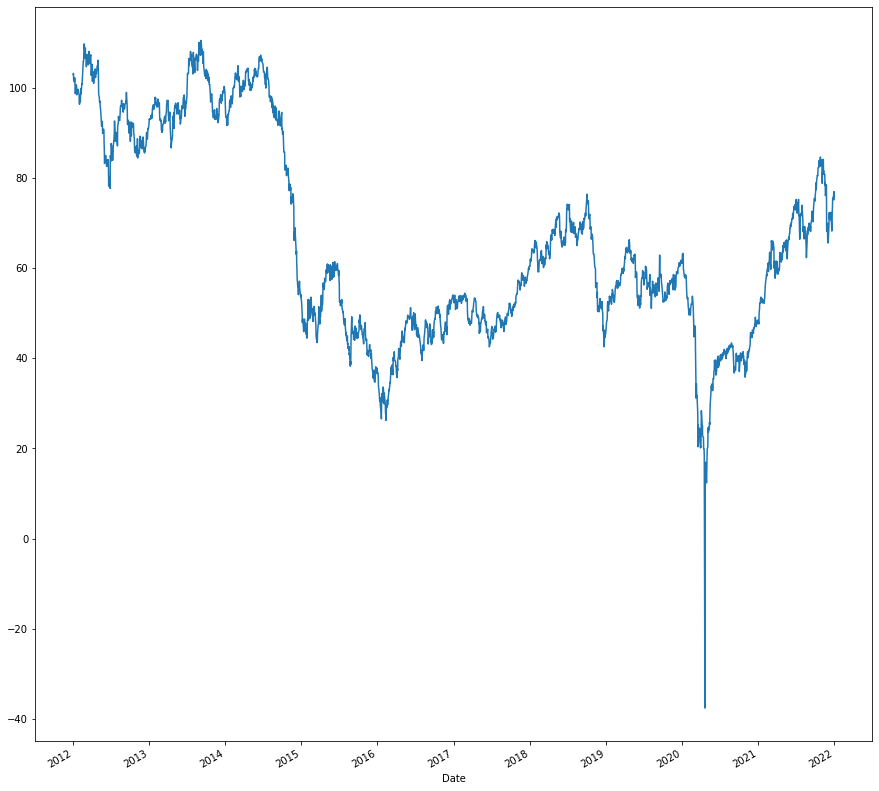

In [12]:
df['CLc1'].plot(subplots=True, figsize=(15,15))

array([<AxesSubplot:xlabel='Date'>], dtype=object)

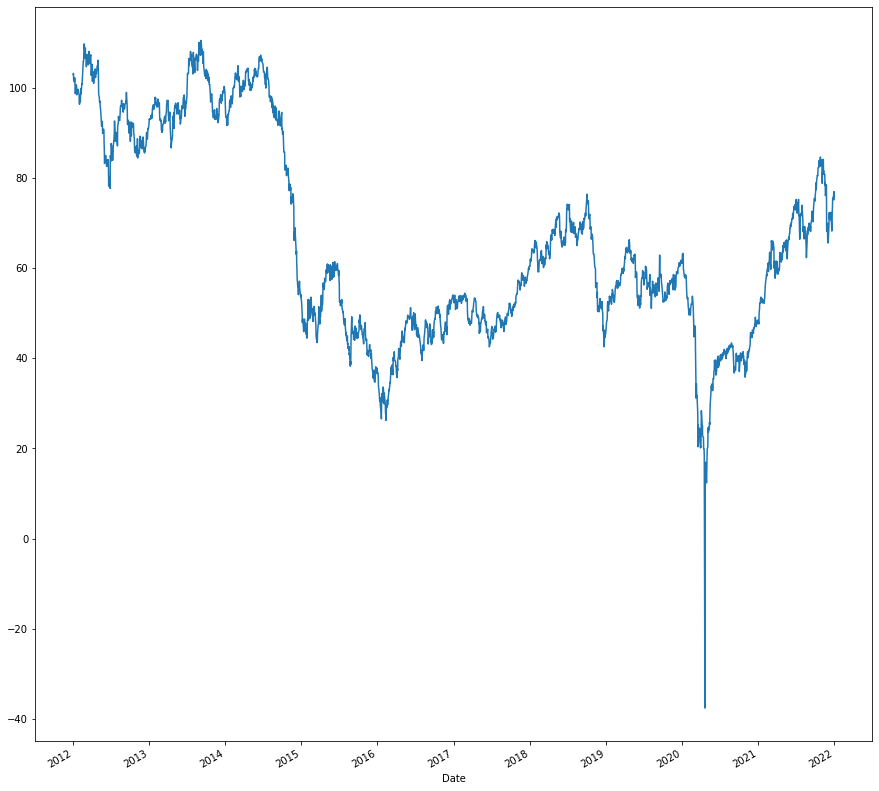

In [13]:
df_backfill['CLc1'].plot(subplots=True, figsize=(15,15))